# init

In [ ]:
from imagenette_experiments.train_utils import *

In [ ]:
# from kornia.contrib import MaxBlurPool2d

In [ ]:
from fastai.basic_train import *
from fastai.vision import *
from model_constructor.net import Net, act_fn, NewResBlock
from model_constructor.layers import SimpleSelfAttention, ConvLayer

# new Stem

In [ ]:
def _make_stem_new(self):
    '''new vers, 4 layers, stride on 1, groups'''
#         stride_on=1
#         stride_by_pool = False
    stem = []
    stem.append((f"conv_0", self.conv_layer(3,    32, stride=1, act_fn=self.act_fn, bn_1st=self.bn_1st)))
    stem.append((f"conv_1", self.conv_layer(32,   64, stride=2, act_fn=self.act_fn, bn_1st=self.bn_1st)))
    stem.append((f"conv_2", self.conv_layer(64,  128, stride=1, act_fn=self.act_fn, bn_1st=self.bn_1st,
                                          groups=16,)))
    stem.append((f"conv_3", self.conv_layer(128, 256, stride=1, act_fn=self.act_fn, bn_1st=self.bn_1st,
                                          groups=32,)))
#         if stride_by_pool:
#             stem.insert(stride_on, ('reduce_stem', self.stem_pool))
#             stem.insert(stride_on+1, ('reduce_bn', nn.BatchNorm2d(self.stem_sizes[stride_on])))
    stem.append(('stem_pool', self.stem_pool))
    if self.stem_bn_end: stem.append(('norm', self.norm(self.stem_sizes[-1])))
    return nn.Sequential(OrderedDict(stem))

# Parameters

In [ ]:
mixup = 0.2

In [ ]:
size = 192
bs = 32
epochs=80

# Model

In [ ]:
model = Net(c_out=10, layers=[3,6,8,3], expansion=4)
model.block = NewResBlock
model.act_fn = Mish()

In [ ]:
model._make_stem = _make_stem_new

In [ ]:
model.sa=True
model.groups =4
model.stem_sizes = [3,32,64,128,256]

## model

In [ ]:
model.stem

Sequential(
  (conv_0): ConvLayer(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_fn): Mish()
  )
  (conv_1): ConvLayer(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_fn): Mish()
  )
  (conv_2): ConvLayer(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_fn): Mish()
  )
  (conv_3): ConvLayer(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_fn): Mish()
  )
  (stem_pool): MaxPool2d(kernel_size=3, stride=2, 

In [ ]:
model.body

Sequential(
  (l_0): Sequential(
    (bl_0): NewResBlock(
      (convs): Sequential(
        (conv_0): ConvLayer(
          (conv): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): Mish()
        )
        (conv_1): ConvLayer(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): Mish()
        )
        (conv_2): ConvLayer(
          (conv): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (merge): Mish()
    )
    (bl_1): NewResBlock(
      (convs): Sequential(
        (conv_0): ConvLayer(
          (conv): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), 

## summary

In [ ]:
learn = get_learn(model=model, size=size, bs=bs, mixup=mixup)

data path   /notebooks/data/imagewoof2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Learn path /notebooks/data/imagewoof2


In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [32, 192, 192]       864        True      
______________________________________________________________________
BatchNorm2d          [32, 192, 192]       64         True      
______________________________________________________________________
Mish                 [2048, 6, 6]         0          False     
______________________________________________________________________
Conv2d               [64, 96, 96]         18,432     True      
______________________________________________________________________
BatchNorm2d          [64, 96, 96]         128        True      
______________________________________________________________________
Mish                 [2048, 6, 6]         0          False     
______________________________________________________________________
Conv2d               [128, 96, 96]        4,608      True      
___________________________________________________

## lr find

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time


/opt/conda/conda-bld/pytorch_1591914855613/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value)


set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


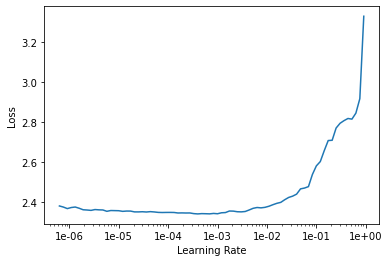

In [ ]:
learn.lr_find()
learn.recorder.plot()

# pct start = 0.5 9011 0.0001

In [ ]:
res=[]

In [ ]:
learn = get_learn(model=model, size=size, bs=bs, mixup=mixup)
learn.fit_fc(epochs, lr=4e-3, moms=(0.95,0.95), start_pct=0.5)
res += [learn.recorder.metrics[-1][0].item()]

data path   /notebooks/data/imagewoof2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Learn path /notebooks/data/imagewoof2


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.045181,1.834633,0.403665,0.882922,02:23
1,1.811513,1.591556,0.528888,0.927971,02:26
2,1.662277,1.426720,0.598880,0.948842,02:26
3,1.522423,1.249655,0.691779,0.958005,02:27
4,1.458905,1.197891,0.715195,0.964877,02:28
5,1.392023,1.110638,0.759226,0.971749,02:28
6,1.318535,1.069143,0.774497,0.975057,02:27
7,1.308643,1.026081,0.796131,0.977093,02:28
8,1.248607,0.978242,0.817256,0.979893,02:27
9,1.253049,0.980652,0.808348,0.982184,02:27


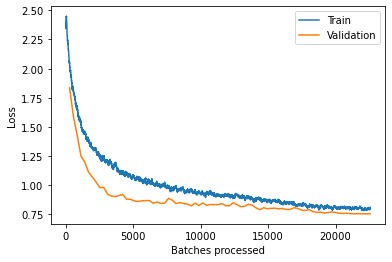

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn = get_learn(model=model, size=size, bs=bs, mixup=mixup)
learn.fit_fc(epochs, lr=4e-3, moms=(0.95,0.95), start_pct=0.5)
res += [learn.recorder.metrics[-1][0].item()]

data path   /notebooks/data/imagewoof2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Learn path /notebooks/data/imagewoof2


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.051938,1.873728,0.406974,0.854925,02:28
1,1.822254,1.561403,0.547977,0.919063,02:29
2,1.695190,1.427811,0.597353,0.949096,02:27
3,1.544489,1.275470,0.682871,0.958259,02:28
4,1.451445,1.165354,0.738865,0.967676,02:27
5,1.399176,1.108733,0.762789,0.974294,02:29
6,1.325909,1.073325,0.770934,0.974294,02:28
7,1.320318,1.017468,0.793077,0.978366,02:28
8,1.257514,0.985596,0.807585,0.978621,02:29
9,1.234191,0.960094,0.819547,0.979893,02:29


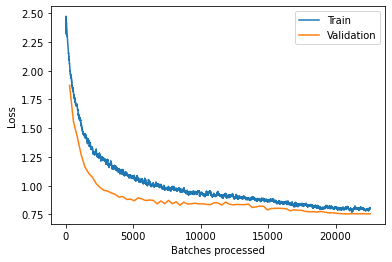

In [ ]:
learn.recorder.plot_losses()

### res 9011 0.0001

In [ ]:
res

[0.9009926319122314, 0.9012471437454224]

In [ ]:
stat = np.array(res)

In [ ]:
stat.mean(), stat.std()

(0.9011198878288269, 0.00012725591659545898)

# pct start =  0.4 9027

In [ ]:
res=[]

In [ ]:
learn = get_learn(model=model, size=size, bs=bs, mixup=mixup)
learn.fit_fc(epochs, lr=4e-3, moms=(0.95,0.95), start_pct=0.4)
res += [learn.recorder.metrics[-1][0].item()]

data path   /notebooks/data/imagewoof2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Learn path /notebooks/data/imagewoof2


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.028447,1.816024,0.418173,0.866378,02:27
1,1.803714,1.524516,0.548486,0.928481,02:28
2,1.652679,1.393331,0.619496,0.947569,02:28
3,1.539977,1.200333,0.712395,0.968949,02:28
4,1.449986,1.159575,0.728175,0.969458,02:28
5,1.365767,1.097864,0.768898,0.971494,02:28
6,1.319454,1.048688,0.786714,0.977093,02:28
7,1.316811,1.076991,0.769661,0.976330,02:27
8,1.247685,0.977651,0.813184,0.978366,02:28
9,1.216128,0.961996,0.820820,0.982693,02:28


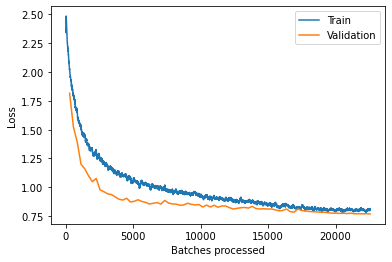

In [ ]:
learn.recorder.plot_losses()

### res 9027

In [ ]:
res

[0.9027742147445679]

In [ ]:
stat = np.array(res)

In [ ]:
stat.mean(), stat.std()